In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Some Numerical Information about the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

## Data Preprocessing

In [3]:
# Create Age Group
df['age'] = pd.cut(df['age'], bins=[17, 29, 41, 53, 65], labels=['18-29', '29-41', '41-53', '53-65'])

In [4]:
# Remove Outlayers
df = df[df['charges']<50000]

## Data Visualization

In [5]:
# Define list of Continuous columns Names
continuous = ['charges', 'bmi']

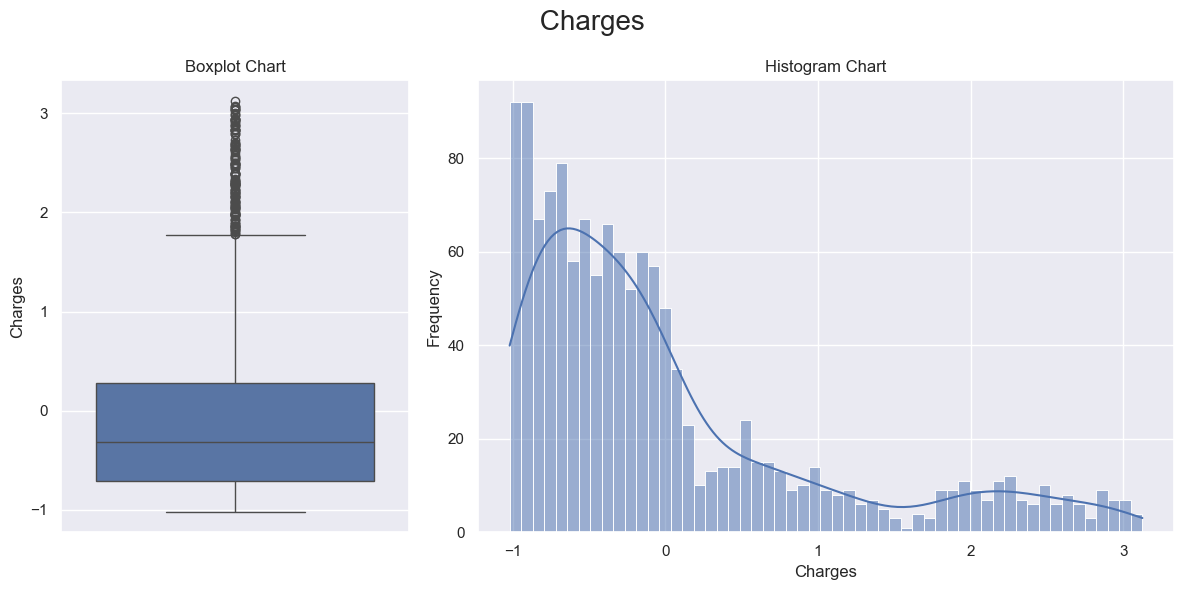

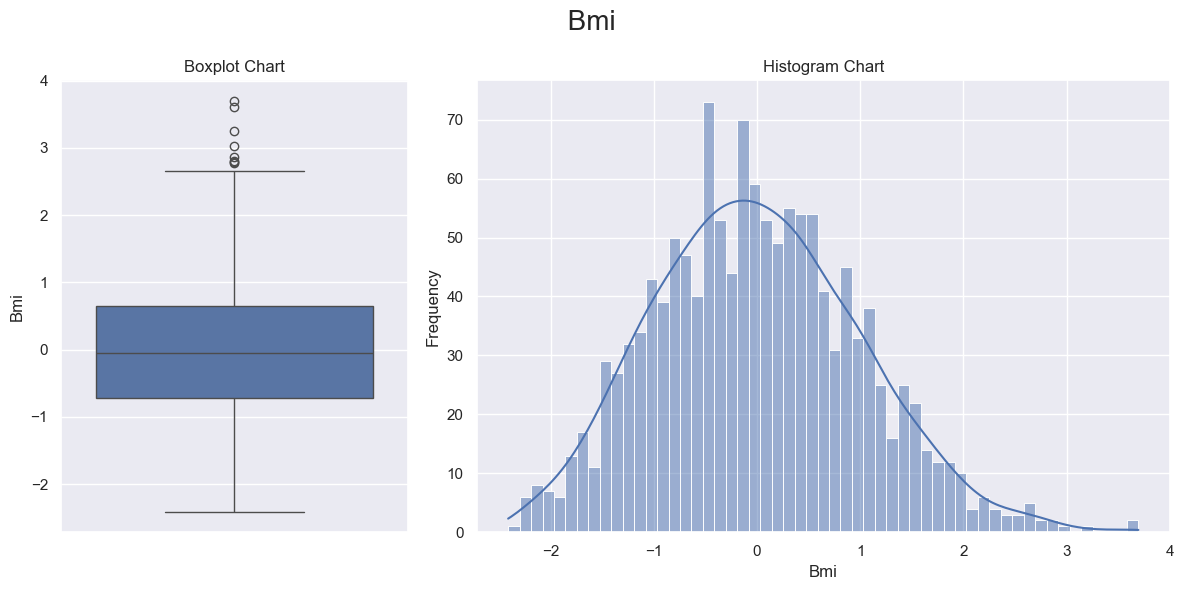

In [15]:
# Define a function to Capitalize the first element of string and remove '_' character
def title(name):
    return (' '.join(word.capitalize()for word in name.split('_')))


# Distribution of Categorical Features
def plot_continious_distribution(df, column):

    width_ratios = [2, 4]
    gridspec_kw = {'width_ratios':width_ratios}
    fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw = gridspec_kw) 
    fig.suptitle(f' {title(column)} ', fontsize=20) 
    
    sns.boxplot(df[column], ax=ax[0])
    ax[0].set_title('Boxplot Chart')
    ax[0].set_ylabel(title(column))

    sns.histplot(x = df[column], kde=True, ax=ax[1], multiple = 'stack', bins=55)
    ax[1].set_title('Histogram Chart')
    ax[1].set_ylabel('Frequency')
    ax[1].set_xlabel(title(column))

    plt.tight_layout()
    plt.show()
for conti in continuous :
    plot_continious_distribution(df, conti)    

In [7]:
# Define list Name of Categorical columns 
categorical = ['sex', 'smoker', 'age', 'children', 'region']

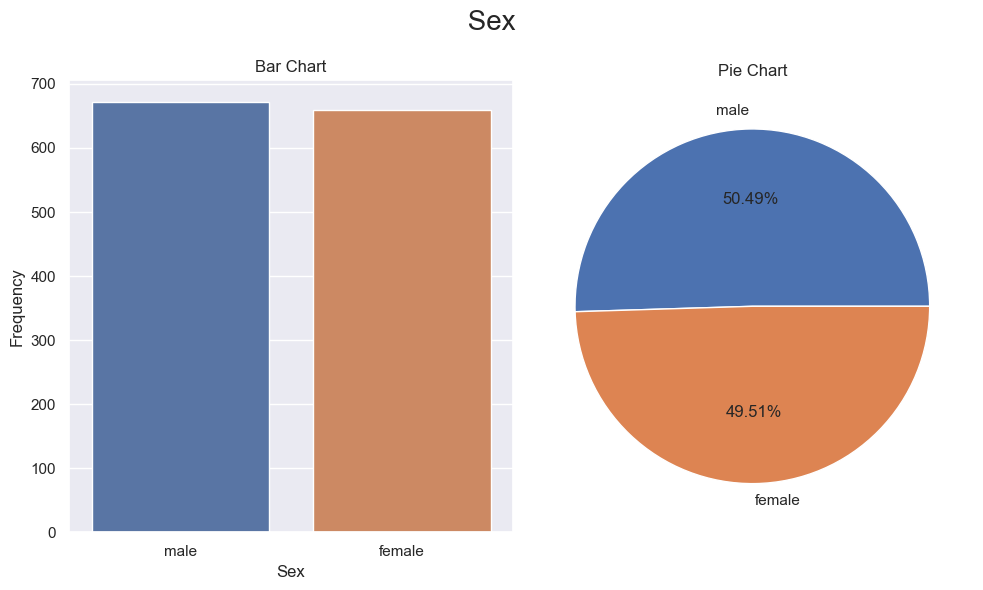

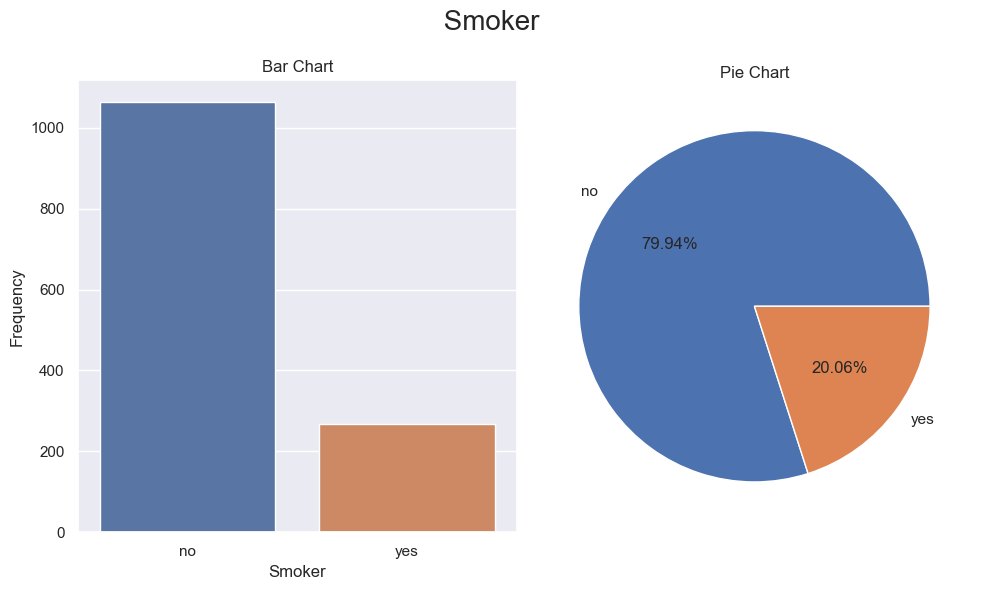

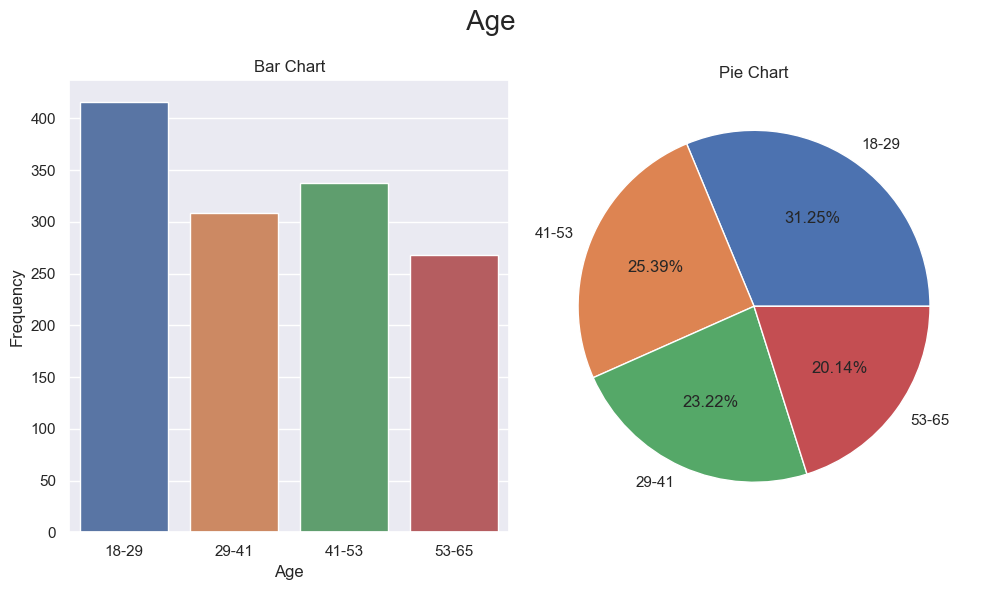

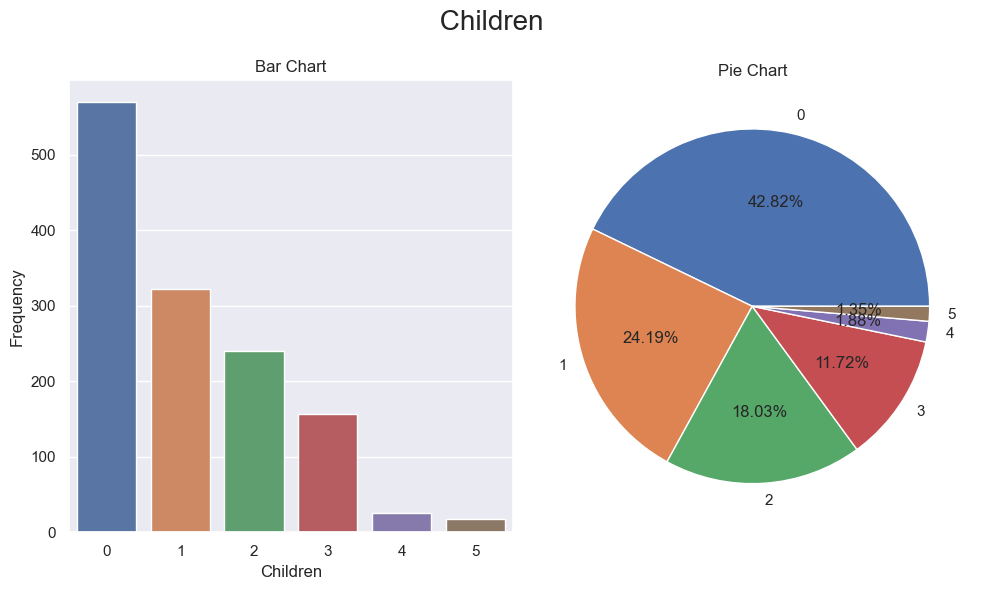

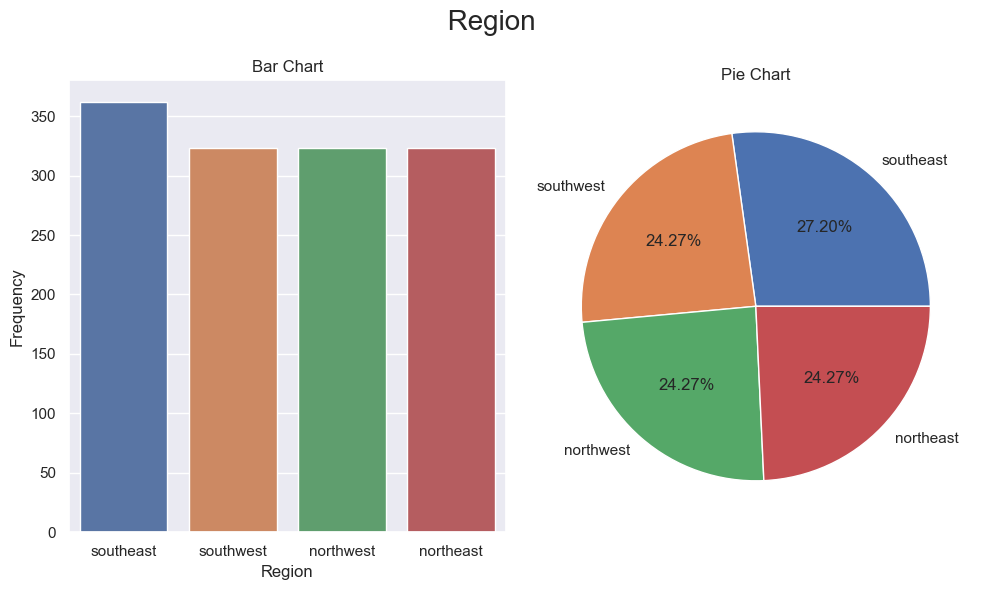

In [8]:
# distribution of categorical features

def plot_categorical_distribution(df, column):
    fig, ax = plt.subplots(1, 2, figsize=(10, 6)) 
    fig.suptitle(f' {title(column)} ', fontsize=20) 
    
    sns.barplot(df[column].value_counts(), ax=ax[0], palette='deep')
    ax[0].set_title('Bar Chart')
    ax[0].set_xlabel(title(column))
    ax[0].set_ylabel('Frequency')
    
    
    df[column].value_counts().plot(kind='pie', autopct="%.2f%%", ax=ax[1])
    ax[1].set_title('Pie Chart')
    ax[1].set_ylabel(None)
    
    plt.tight_layout()
    plt.show()
    
for cat in categorical:
    plot_categorical_distribution(df, cat)

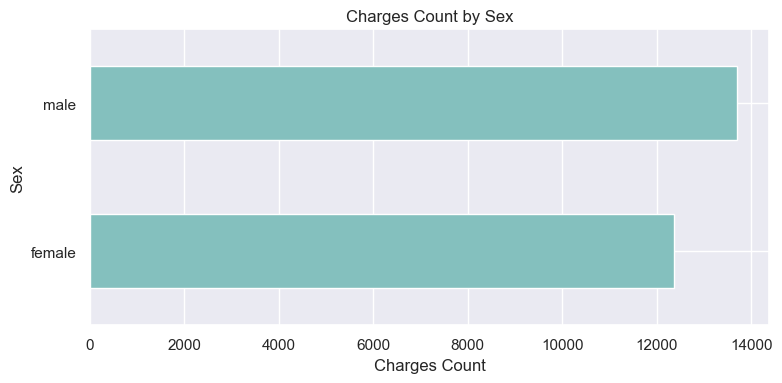

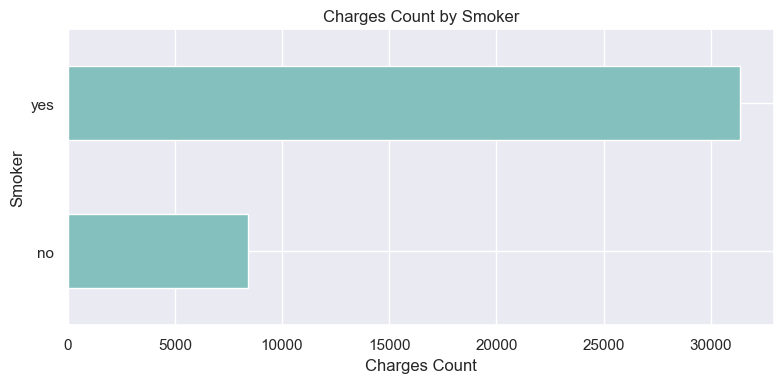

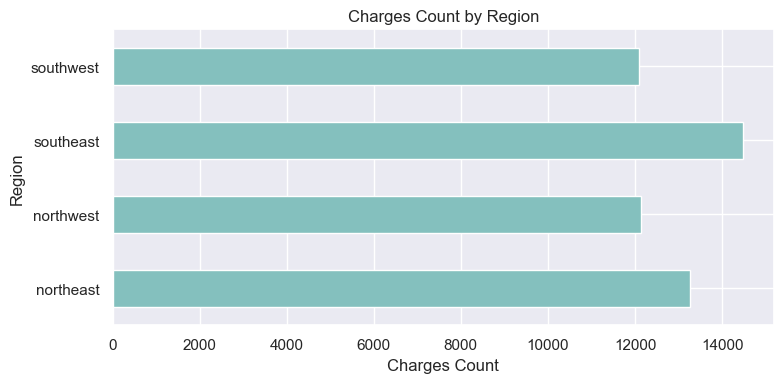

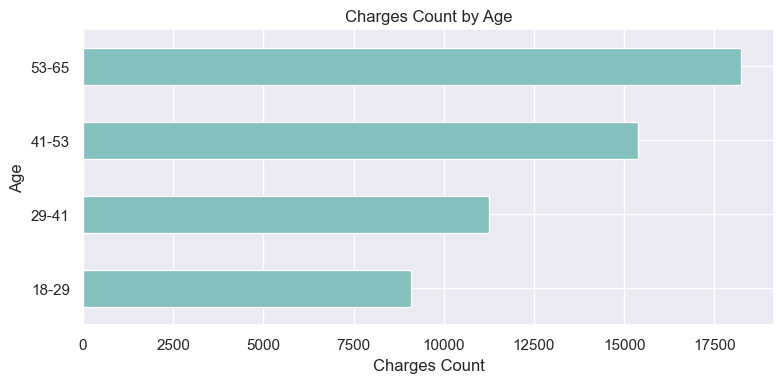

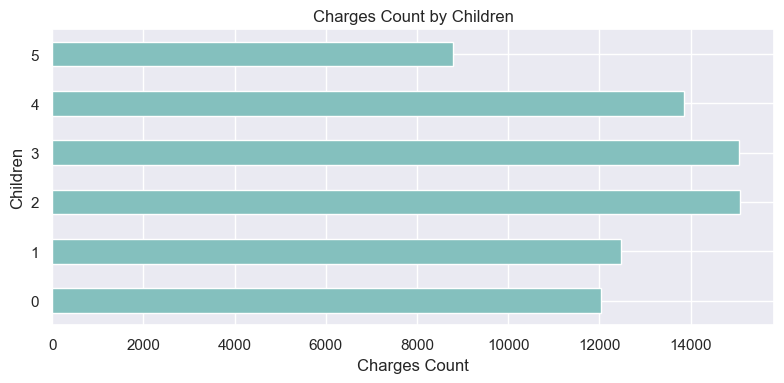

In [10]:
# Define a Function for Barh Plot
def bar_plot(x, y, df):
    barh = df.groupby([x])[y].mean()
    barh.plot(kind='barh',  color = '#84c0be', figsize=(8,4))
    plt.title(f'{title(y)} Count by {title(x)}')
    plt.xlabel(f'{title(y)} Count')
    plt.ylabel(title(x))

    plt.tight_layout()
    plt.show()

bar_plot('sex', 'charges', df)
bar_plot('smoker', 'charges', df)
bar_plot('region', 'charges', df)
bar_plot('age', 'charges', df)
bar_plot('children', 'charges', df)

## Data Preprocessing

In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Initialize StandardSaler
stc = StandardScaler()
# Initialize LabelEncoder
le = LabelEncoder()

stc_cols = ['bmi', 'charges']
le_cols = ['sex', 'smoker']
dum_cols= ['region', 'age']

# Apply Standard Scaler to the selected columns
df[stc_cols] = stc.fit_transform(df[stc_cols])

# Apply Label Encoder to the selected columns
for col in le_cols :
    df[col] = le.fit_transform(df[col])

# Apply get_dummies to the selected columns
df = pd.get_dummies(df, columns=dum_cols)

## Training and Evaluating Different Models

In [12]:
from sklearn.model_selection import train_test_split 

x = df.drop(['charges'], axis=1)
y = df['charges']   # Target Variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
#Importing the Libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

In [14]:
# List of Mdels to Try
models = [
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('K-Nearest Neighbors', KNeighborsRegressor()),
    ('XGB Regressor', XGBRegressor())
]

# Train and evaluate each model
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}: Mean Squared Error = {round(mse,3)}, R-squared = {round(r2, 3)}')

Decision Tree: Mean Squared Error = 0.247, R-squared = 0.787
Random Forest: Mean Squared Error = 0.159, R-squared = 0.863
Gradient Boosting: Mean Squared Error = 0.135, R-squared = 0.884
K-Nearest Neighbors: Mean Squared Error = 0.528, R-squared = 0.545
XGB Regressor: Mean Squared Error = 0.186, R-squared = 0.84


In [21]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5]
}

# Initialize the Gradient Boosting regressor
gb_regressor = GradientBoostingRegressor()
# Initialize GridSearchCV
grid_search_gb = GridSearchCV(estimator=gb_regressor, param_grid=param_grid_gb, cv=5, scoring='neg_mean_squared_error', verbose=True)


# Fit the grid search to the data
grid_search_gb.fit(x_train, y_train)

# Get the best parameters
gb_best_params = grid_search_gb.best_params_

# Retrain the model with the best parameters
gb_model_best = GradientBoostingRegressor(**gb_best_params)
gb_model_best.fit(x_train, y_train)

# Predict using the updated features
y_pred_best = gb_model_best.predict(x_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [22]:
# Evaluate the tuned Gradient Boosting model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Best Parameters: {gb_best_params}')
print(f'Mean Squared Error (Tuned Gradient Boosting): {round(mse_best, 3)}')
print(f'R-squared (Tuned Gradient Boosting): {round(r2_best, 3)}')

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Mean Squared Error (Tuned Gradient Boosting): 0.134
R-squared (Tuned Gradient Boosting): 0.885


In [46]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = { 
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 5, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 1]
}

# Initialize the XGB Regressor
xgb_best = XGBRegressor()
# Initialize GridSearchCV
grid_search = GridSearchCV(xgb_best, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=True)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters
xgb_best_params = grid_search.best_params_

# Retrain the model with the best parameters
xgb_model_best = XGBRegressor(**xgb_best_params)
xgb_model_best.fit(x_train, y_train)

# Predict using the updated features
y_pred_best = xgb_model_best.predict(x_test)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits


In [47]:
# Evaluate the tuned XGB Regressor model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Best Parameters: {xgb_best_params}')
print(f'Mean Squared Error (Tuned XGB Regressor): {round(mse_best, 3)}')
print(f'R-squared (Tuned XGB Regressor): {round(r2_best, 3)}')

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 1, 'subsample': 0.8}
Mean Squared Error (Tuned XGB Regressor): 0.134
R-squared (Tuned XGB Regressor): 0.885


In [57]:
model1 = GradientBoostingRegressor(**gb_best_params)
model2 = XGBRegressor(**xgb_best_params)
# Create Ensemble Model
ensemble_model = VotingRegressor(estimators=[ ('gbt', model1), ('xgb', model2)])

# Model Training
ensemble_model.fit(x_train, y_train)

# Predict y_test  Values 
y_best_pred = ensemble_model.predict(x_test)

# Evaluate Model Accuracy 
mse = mean_squared_error(y_test, y_best_pred)
r2 = r2_score(y_test, y_best_pred)
print(f'Ensemble Model : Mean Squared Error = {round(mse,3)}\n R-squared = {round(r2, 3)}')


Ensemble Model : Mean Squared Error = 0.133
 R-squared = 0.886


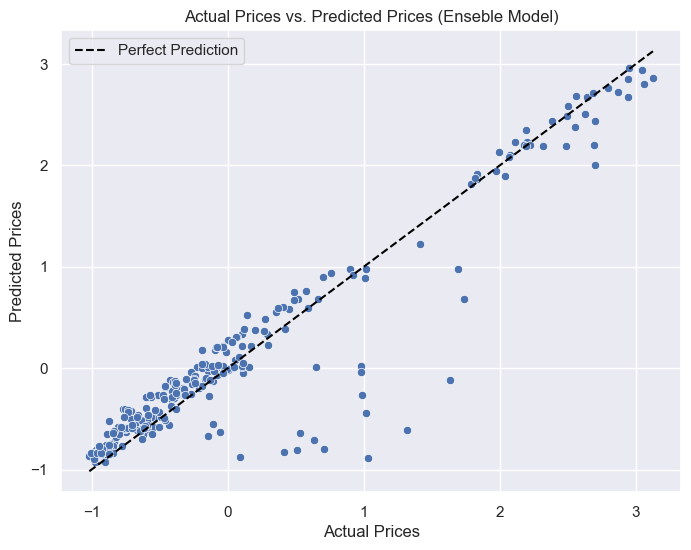

In [58]:
# Visualize the Predicted Prices Against the Actual Prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_best_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='black', label='Perfect Prediction')
plt.title('Actual Prices vs. Predicted Prices (Enseble Model)')
plt.ylabel('Predicted Prices')
plt.xlabel('Actual Prices')
plt.legend()
plt.show()

### Summary and Conclusion

In this project, I focused on predicting medical costs using various data preprocessing techniques and machine learning models. The steps and methodologies employed are as follows:

1. Data Cleaning and Preprocessing:
   - Age Categorization: The age of individuals was converted into categorical variables to enhance model performance.
   - Outlier Removal: Outliers were identified and removed from the dataset to improve the accuracy and robustness of the model.

2. Data Visualization:
   - Appropriate visualizations were created to explore and understand the data patterns and relationships, providing valuable insights into the dataset.

3. Data Standardization and Label Encoding:
   - Data standardization was performed to normalize the features.
   - Label encoding was applied to convert categorical variables into numerical format.

4. Model Training and Ensemble Learning:
   - Two models, Gradient Boosting and XGBoost, were trained on the processed dataset.
   - These models were combined using an ensemble approach to leverage their strengths and improve overall accuracy.

5. Model Evaluation:
   - The ensemble model achieved a final accuracy of 88.6%.

These steps ensured a comprehensive analysis and model training process, leading to a robust prediction model for medical costs.
### *Developed by Hosein Mohammadi*
GitHub : https://github.com/Hosein541

Kaggle : https://www.kaggle.com/hoseinnnnnnn 

Gmail : Huseinmohammadi83@gmail.com